# 📊 Veri Bilimi Stajyer Vaka Çalışması – Keşifsel Veri Analizi (EDA)

- İsim Soyisim: Aysun Ataş
- e-posta: aysuatass1650@gmail.com


# Veri Bilimi Stajyer Vaka Çalışması

## Genel Bakış:

2235 gözlem ve 13 özellikten oluşan bir fiziksel tıp ve rehabilitasyon veri seti üzerinde çalışılacak. Hedef, kapsamlı bir Keşifsel Veri Analizi (EDA) yapmak ve verileri potansiyel öngörüsel modelleme için hazır hale getirmektir.

**Hedef Tanımı:** Bu vaka için hedef değişken **TedaviSuresi’dir**.
Bir model kurmanız gerekmiyor; göreviniz verileri bu hedef etrafında modellemeye hazır (temiz, tutarlı ve analiz edilebilir) hale getirmektir.

Veri Seti Sütunları:

- HastaNo: Anonimleştirilmiş hasta ID’si
- Yaş: Yaş
- Cinsiyet: Cinsiyet
- KanGrubu: Kan grubu
- Uyruk: Uyruk
- KronikHastalık: Kronik hastalıklar (virgülle ayrılmış liste)
- Bölüm: Bölüm/Klinik
- Alerji: Alerjiler (tekil ya da virgülle ayrılmış)
- Tanılar: Tanılar
- TedaviAdı: Tedavi adı
- TedaviSuresi: Tedavi süresi (seans sayısı)
- UygulamaYerleri: Uygulama yerleri
- UygulamaSuresi: Uygulama süresi (dakika)
---
# Görevler

### 1. Keşifsel Veri Analizi (EDA):

Bu aşamada Python kullanarak veri setini kapsamlı şekilde incelemeniz bekleniyor.
Pandas, Matplotlib ve Seaborn gibi kütüphaneleri kullanarak verilerin genel yapısını anlamalı, değişken tiplerini tanımlamalı, anormallikleri veya eksik verileri tespit etmelisiniz.
Veri görselleştirme teknikleri (ör. histogramlar, dağılım grafikleri, ısı haritaları) kullanarak veri içindeki desen ve ilişkileri ortaya çıkarmalısınız.

### 2. Veri Ön İşleme:

EDA bulgularına dayanarak veriyi temizleyip modellemeye hazır hale getirin.
Bu; eksik verilerin işlenmesini, kategorik değişkenlerin kodlanmasını, sayısal özelliklerin normalize/standart hale getirilmesini ve diğer veri kalitesi sorunlarının çözülmesini içerir.
Örneğin: eksik veriler için SimpleImputer veya KNNImputer, kategorik veriler için OneHotEncoder veya LabelEncoder kullanılabilir.



In [483]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

# Sütunların yan yana görünmesi için
pd.set_option('display.max_columns', None)  # tüm sütunları gösterir
pd.set_option('display.width', 150)        # toplam genişlik
pd.set_option('display.expand_frame_repr', True)  # ekrana sığmazsa alt satıra geçirir
#pd.set_option('display.float_format', '{:.10f}'.format) 

sns.set(style="whitegrid")

In [484]:
df = pd.read_csv("C:/Users/aysun/OneDrive/Masaüstü/VERİ BİLİMİ/talentproje/Talent_Academy_Case_DT_2025(Sheet1) (1).csv", delimiter=";")
df.head()

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika


In [485]:
df.drop(columns=['HastaNo'], inplace=True)

In [486]:
# ===============================
# Keşifçi Veri Analizi 
# ===============================

def exploratory_data_analysis(df, top_n=5):

    print("========== Veri Boyutu ==========")
    print(f"Satır sayısı: {df.shape[0]}")
    print(f"Sütun sayısı: {df.shape[1]}")
    
    print("\n========== Sütunlar ve Veri Tipleri ==========")
    print(df.dtypes)
    
    print("\n========== Boş Değerler ==========")
    missing_count = df.isnull().sum()
    missing_df = pd.DataFrame({'Eksik Sayısı': missing_count})
    display(missing_df.sort_values(by='Eksik Sayısı', ascending=False))
    
    print("\n========== Sayısal Sütunlar Temel İstatistikler ==========")
    display(df.describe())
    
    print("\n========== Kategorik Sütunlar Frekans ==========")
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    for col in cat_cols:
        print(f"\n--- {col} ---")
        display(df[col].value_counts().head(top_n))
    
    print("\n========== Analiz Tamamlandı ==========")

exploratory_data_analysis(df, top_n=5)

========== Veri Boyutu ==========
Satır sayısı: 2235
Sütun sayısı: 12

========== Sütunlar ve Veri Tipleri ==========
Yas                 int64
Cinsiyet           object
KanGrubu           object
Uyruk              object
KronikHastalik     object
Bolum              object
Alerji             object
Tanilar            object
TedaviAdi          object
TedaviSuresi       object
UygulamaYerleri    object
UygulamaSuresi     object
dtype: object

========== Boş Değerler ==========


,Eksik Sayısı
Alerji,944
KanGrubu,675
KronikHastalik,611
UygulamaYerleri,221
Cinsiyet,169
Tanilar,75
Bolum,11
Yas,0
Uyruk,0
TedaviAdi,0



========== Sayısal Sütunlar Temel İstatistikler ==========


,Yas
count,2235.0000000000
mean,47.3270693512
std,15.2086342906
min,2.0000000000
25%,38.0000000000
50%,46.0000000000
75%,56.0000000000
max,92.0000000000



========== Kategorik Sütunlar Frekans ==========

--- Cinsiyet ---


Cinsiyet
Kadın    1274
Erkek     792
Name: count, dtype: int64


--- KanGrubu ---


KanGrubu
0 Rh+     579
A Rh+     540
B Rh+     206
AB Rh+     80
B Rh-      68
Name: count, dtype: int64


--- Uyruk ---


Uyruk
Türkiye       2173
Tokelau         27
Arnavutluk      13
Azerbaycan      12
Libya           10
Name: count, dtype: int64


--- KronikHastalik ---


KronikHastalik
Myastenia gravis                        38
Aritmi                                  36
Fascioscapulohumeral Distrofi           36
Hipertiroidizm                          34
Limb-Girdle Musküler Distrofi, Astım    34
Name: count, dtype: int64


--- Bolum ---


Bolum
Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    2045
Ortopedi Ve Travmatoloji                            88
İç Hastalıkları                                     32
Nöroloji                                            17
Kardiyoloji                                         11
Name: count, dtype: int64


--- Alerji ---


Alerji
Polen               198
POLEN               134
Toz                 119
ARVELES,CORASPIN    102
Sucuk                91
Name: count, dtype: int64


--- Tanilar ---


Tanilar
DORSALJİ, DİĞER, LUMBOSAKRAL BÖLGE                 149
Omuzun darbe sendromu                              128
İntervertebral disk bozuklukları, tanımlanmamış    116
DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE               96
Eklem ağrısı                                        51
Name: count, dtype: int64


--- TedaviAdi ---


TedaviAdi
Dorsalji -Boyun+trapez    231
İV DİSK BOZUKLUĞU-BEL     200
Dorsalji 1                140
Dorsalji-Bel              120
Gonartroz-Meniskopati      95
Name: count, dtype: int64


--- TedaviSuresi ---


TedaviSuresi
15 Seans    1670
10 Seans     175
20 Seans     113
2 Seans       45
17 Seans      36
Name: count, dtype: int64


--- UygulamaYerleri ---


UygulamaYerleri
Bel                 528
Boyun               363
Diz                 177
Sol Omuz Bölgesi    137
Sağ Omuz Bölgesi    127
Name: count, dtype: int64


--- UygulamaSuresi ---


UygulamaSuresi
20 Dakika    1535
5 Dakika      360
10 Dakika     221
15 Dakika      89
30 Dakika      11
Name: count, dtype: int64


========== Analiz Tamamlandı ==========


In [487]:
# sütun adlarının değiştirilmesi
df.rename(columns={'UygulamaSuresi': 'UygulamaSuresi_DK'}, inplace=True)
df.rename(columns={'TedaviSuresi': 'TedaviSuresi_SEANS'}, inplace=True)

In [488]:
df.head()

,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi_SEANS,UygulamaYerleri,UygulamaSuresi_DK
0,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika


In [489]:
# Sütundaki değerlerin isminin değiştirilmesi.
# String olan değerleri integer tipine çevrilmesi.
df['UygulamaSuresi_DK'] = df['UygulamaSuresi_DK'].str.replace(' Dakika', '', regex=False).astype(int)
df['TedaviSuresi_SEANS'] = df['TedaviSuresi_SEANS'].str.replace(' Seans', '', regex=False).astype(int)

In [490]:
df.head()

,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi_SEANS,UygulamaYerleri,UygulamaSuresi_DK
0,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5,Ayak Bileği,20
1,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15,Boyun,20
2,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15,"Boyun,Sırt",20
3,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15,Boyun,5
4,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15,"Boyun,Sırt",20


Cinsiyet
Kadın    1274
Erkek     792
Name: count, dtype: int64


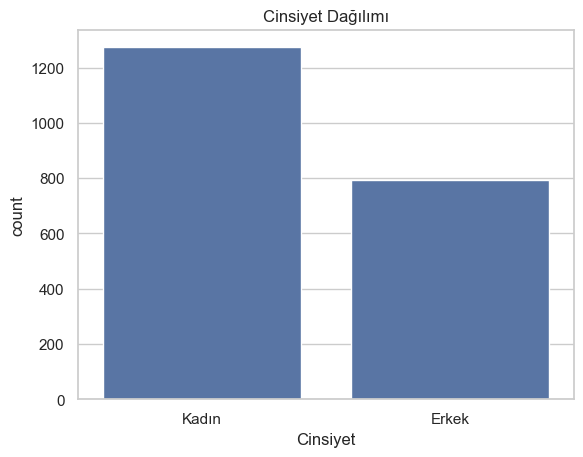

In [491]:
# Kategorik Değişken Analizi
# Cinsiyet dağılımı
print(df["Cinsiyet"].value_counts())

sns.countplot(x="Cinsiyet", data=df)
plt.title("Cinsiyet Dağılımı")
plt.show()

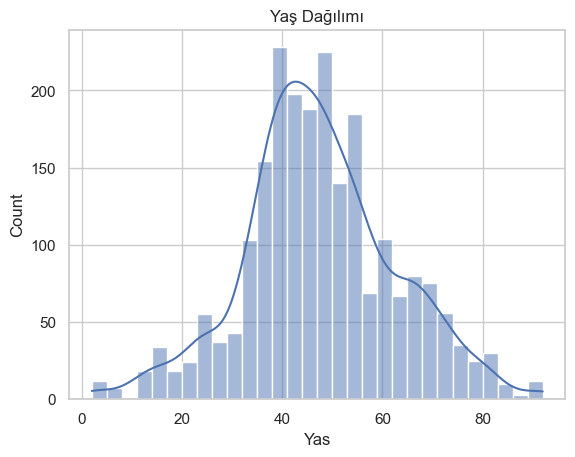

In [492]:
# Sayısal Değişken Analizi
# Yaş dağılımı
sns.histplot(df["Yas"], bins=30, kde=True)
plt.title("Yaş Dağılımı")
plt.show()


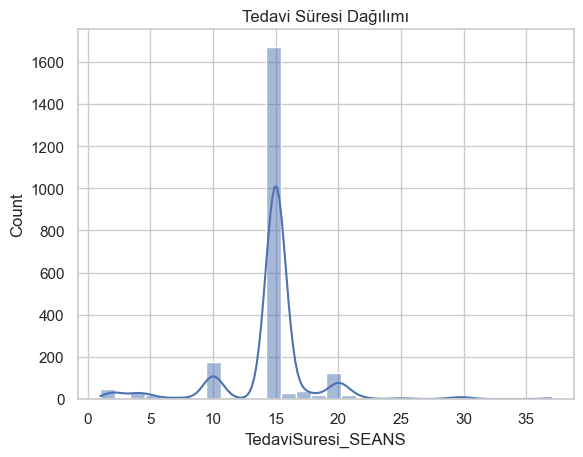

In [493]:
# Hedef Değişken (TedaviSuresi) İncelemesi
sns.histplot(df["TedaviSuresi_SEANS"], bins=30, kde=True)
plt.title("Tedavi Süresi Dağılımı")
plt.show()

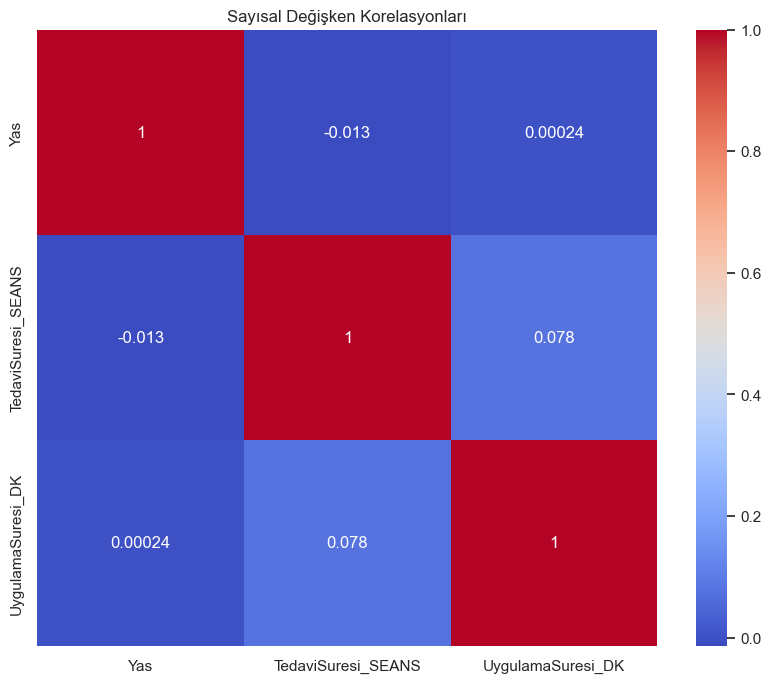

In [494]:
# Korelasyon Analizi
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Sayısal Değişken Korelasyonları")
plt.show()


In [495]:
print(df.columns.tolist())

['Yas', 'Cinsiyet', 'KanGrubu', 'Uyruk', 'KronikHastalik', 'Bolum', 'Alerji', 'Tanilar', 'TedaviAdi', 'TedaviSuresi_SEANS', 'UygulamaYerleri', 'UygulamaSuresi_DK']


In [496]:
print(df['Cinsiyet'].unique())
print(df['Cinsiyet'].value_counts())
print(df['Cinsiyet'].dtype)

['Kadın' 'Erkek' nan]
Cinsiyet
Kadın    1274
Erkek     792
Name: count, dtype: int64
object


In [497]:
from sklearn.impute import SimpleImputer

# Cinsiyet sütunundaki eksik değerleri en sık görülen değer ile doldur
imputer = SimpleImputer(strategy='most_frequent')

# fit_transform ile eksikleri doldur
df['Cinsiyet'] = imputer.fit_transform(df[['Cinsiyet']]).ravel()

# Kontrol
print(df['Cinsiyet'].isnull().sum())  # 0 çıkmalı, eksik değer kalmadı


0


In [498]:
df.head()

,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi_SEANS,UygulamaYerleri,UygulamaSuresi_DK
0,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5,Ayak Bileği,20
1,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15,Boyun,20
2,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15,"Boyun,Sırt",20
3,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15,Boyun,5
4,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15,"Boyun,Sırt",20


In [499]:
# Cinsiyet değişkeninde 169 eksik değer vardı en çok tekrarlayan değer ile dolduruldu.
print(df['Cinsiyet'].unique())
print(df['Cinsiyet'].value_counts())

['Kadın' 'Erkek']
Cinsiyet
Kadın    1443
Erkek     792
Name: count, dtype: int64


In [500]:
# ===============================
# SAYISAL SÜTUNLAR İÇİN PIPELINE
# ===============================

def process_numerical_pipeline(df, scaling='standard'):
    """
    Sayısal sütunlar için eksik değer doldurma ve scaling pipeline
    
    Args:
        df: pandas DataFrame
        scaling: 'standard' veya 'minmax'
        
    Returns:
        df: eksikleri doldurulmuş ve scale edilmiş DataFrame
    """
    
    # Sayısal sütunları seç
    num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
    
    for col in num_cols:
        missing_pct = df[col].isnull().mean() * 100
        
        # Eksik oranına göre doldur
        if missing_pct < 15:
            # Düşük eksik → mean ile doldurulur.
            imputer = SimpleImputer(strategy='mean')
        else:
            # Yüksek eksik → median ile doldurulur.
            imputer = SimpleImputer(strategy='median')
        
        df[col] = imputer.fit_transform(df[[col]]).ravel()
    
    # Scaling
    if scaling == 'standard':
        scaler = StandardScaler()
    elif scaling == 'minmax':
        scaler = MinMaxScaler()
    else:
        raise ValueError("scaling parametresi 'standard' veya 'minmax' olmalı")
    
    df[num_cols] = scaler.fit_transform(df[num_cols])
    
    return df

df = process_numerical_pipeline(df, scaling='standard')
print(df.head())


            Yas Cinsiyet KanGrubu    Uyruk                                     KronikHastalik                                           Bolum  \
0  0.8334585779    Kadın    0 Rh+  Türkiye  Becker Musküler Distrofisi, Hiportiroidizm, Ka...  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi   
1 -1.2710802405    Erkek    0 Rh+  Türkiye  Duchenne Musküler Distrofisi, Myastenia gravis...  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi   
2 -1.2710802405    Erkek    0 Rh+  Türkiye  Duchenne Musküler Distrofisi, Myastenia gravis...  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi   
3 -1.2710802405    Erkek    0 Rh+  Türkiye  Duchenne Musküler Distrofisi, Myastenia gravis...  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi   
4 -1.2710802405    Erkek    0 Rh+  Türkiye  Duchenne Musküler Distrofisi, Myastenia gravis...  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi   

  Alerji                                            Tanilar                        TedaviAdi  TedaviSuresi_SEANS UygulamaYerleri 

In [501]:
# ===============================
# KATEGORİK SÜTUNLAR İÇİN PIPELINE
# ===============================

def process_categorical_pipeline(df, onehot_columns=None):
    """
    Tüm kategorik sütunlar için eksik değer doldurma ve encoding pipeline.
    
    Düşük eksik oranı (<15%) olan sütunlar -> most_frequent ile doldurulur
    Yüksek eksik oranı (>15%) olan sütunlar -> 'Bilinmiyor' ile doldurulur
    Binary sütunlar -> 0/1 integer
    Çok kategorili sütunlar -> OneHotEncoding 
    
    Args:
        df: pandas DataFrame
        onehot_columns: OneHotEncoding yapılacak sütun listesi 
        
    Returns:
        df: eksikleri doldurulmuş ve encode edilmiş DataFrame
    
    """
    
    # Kategorik ve bool sütunları bul
    cat_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
    
    for col in cat_cols:
        missing_pct = df[col].isnull().mean() * 100

        # Eksik değerleri doldur
        if missing_pct < 15:
            # Düşük eksik -> most_frequent
            imputer = SimpleImputer(strategy='most_frequent')
            df[col] = imputer.fit_transform(df[[col]]).ravel()
        else:
            # Yüksek eksik -> 'Bilinmiyor'
            df[col] = df[col].fillna('Bilinmiyor')

        # Binary (True/False) varsa 0/1 yap
        if sorted(df[col].dropna().unique()) == [False, True]:
            df[col] = df[col].astype(int)
    
    # OneHotEncoding
    if onehot_columns:
        df = pd.get_dummies(df, columns=onehot_columns, drop_first=True)

    return df

#  KanGrubu, Bolum, Alerji sütunları çok kategorili olduğu için onehot yapılacak
onehot_cols = ['KanGrubu', 'Bolum', 'Alerji']
df = process_categorical_pipeline(df, onehot_columns=onehot_cols)

print(df.head())
print(df.isnull().sum())

            Yas Cinsiyet    Uyruk                                     KronikHastalik                                            Tanilar  \
0  0.8334585779    Kadın  Türkiye  Becker Musküler Distrofisi, Hiportiroidizm, Ka...         Ayak bileği ve ayağın yüzeysel yaralanması   
1 -1.2710802405    Erkek  Türkiye  Duchenne Musküler Distrofisi, Myastenia gravis...  Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...   
2 -1.2710802405    Erkek  Türkiye  Duchenne Musküler Distrofisi, Myastenia gravis...  Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...   
3 -1.2710802405    Erkek  Türkiye  Duchenne Musküler Distrofisi, Myastenia gravis...  Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...   
4 -1.2710802405    Erkek  Türkiye  Duchenne Musküler Distrofisi, Myastenia gravis...  Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...   

                         TedaviAdi  TedaviSuresi_SEANS UygulamaYerleri  UygulamaSuresi_DK  KanGrubu_0 Rh-  KanGrubu_A Rh+  KanGrubu_A Rh-  \
0                      A

In [502]:
print(df['Cinsiyet'].value_counts())

Cinsiyet
Kadın    1443
Erkek     792
Name: count, dtype: int64


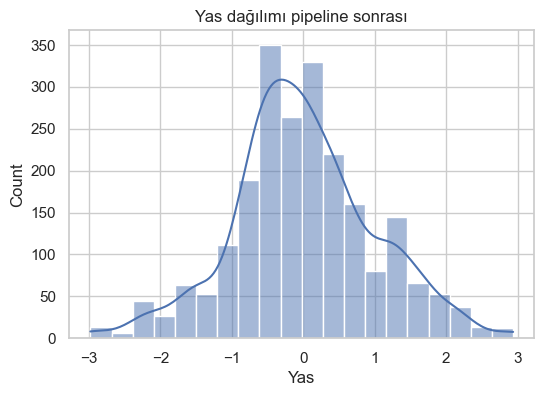

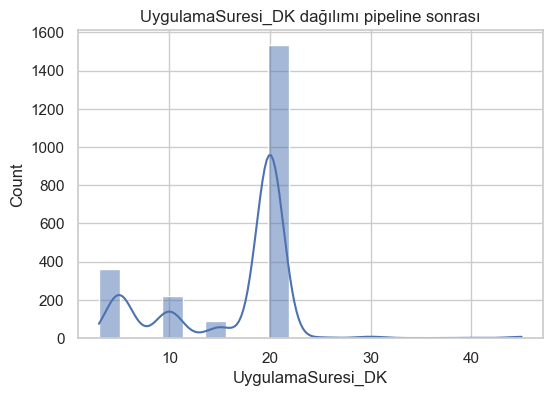

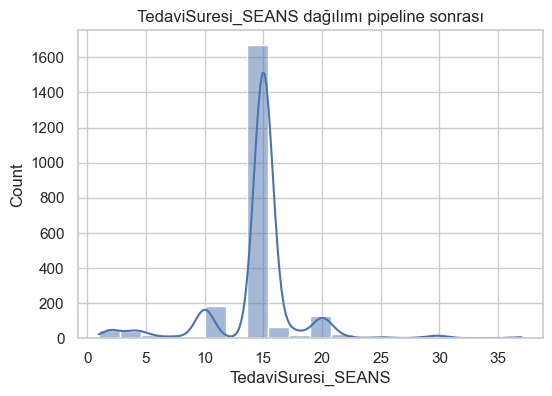

In [503]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['Yas', 'UygulamaSuresi_DK', 'TedaviSuresi_SEANS']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'{col} dağılımı pipeline sonrası')
    plt.show()


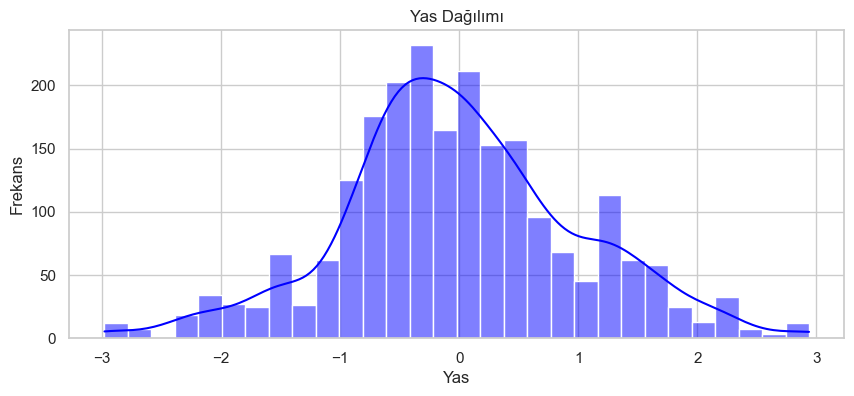

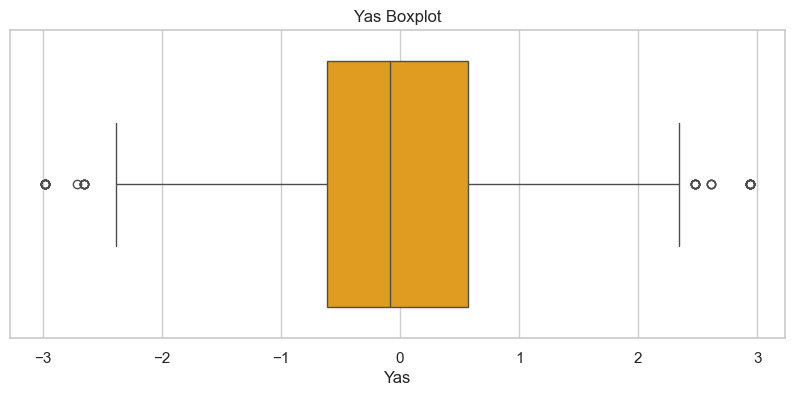

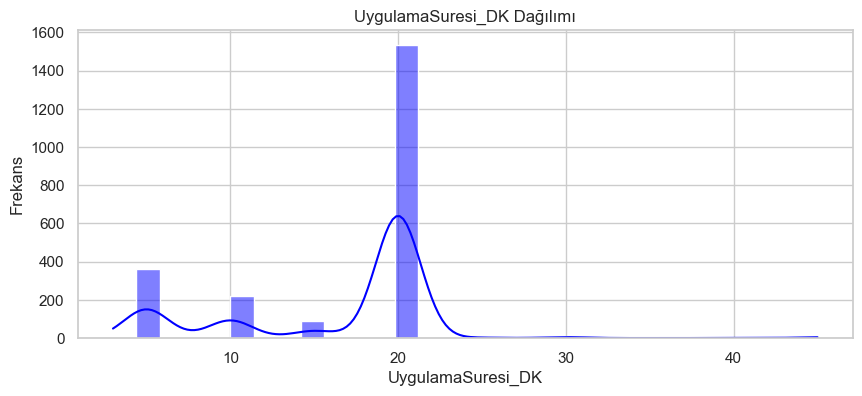

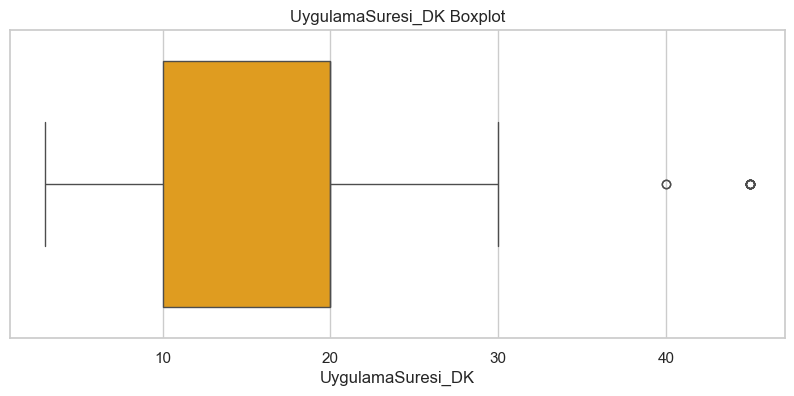

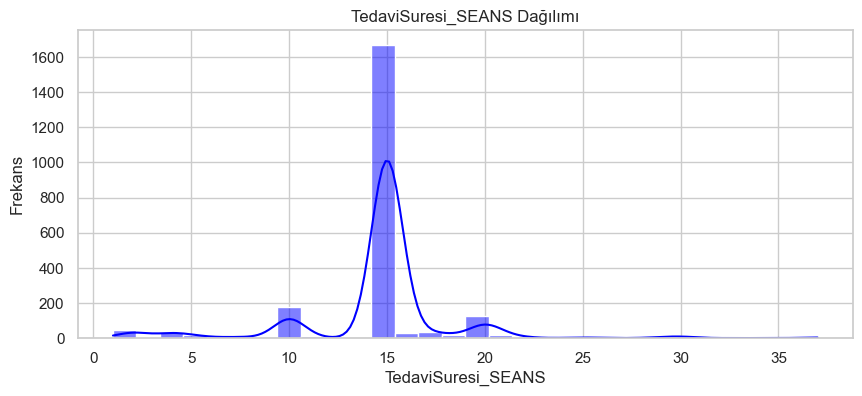

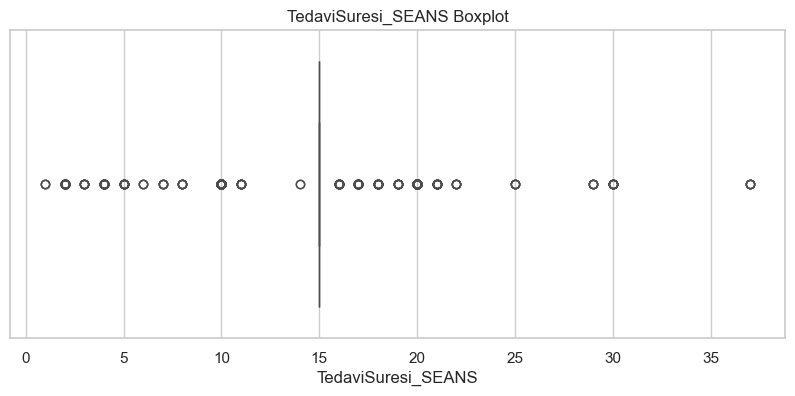

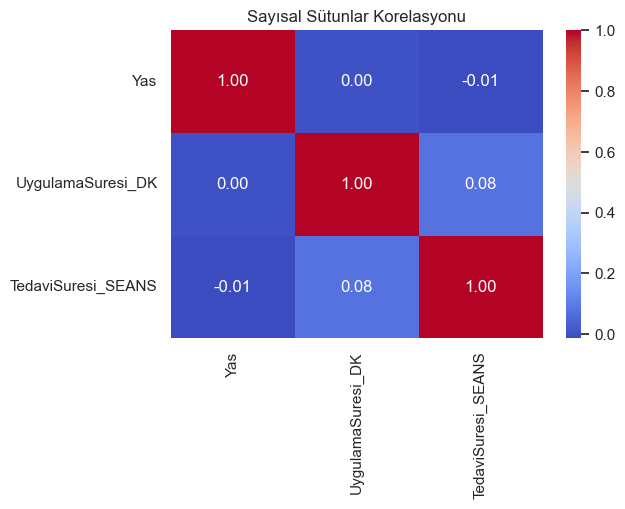

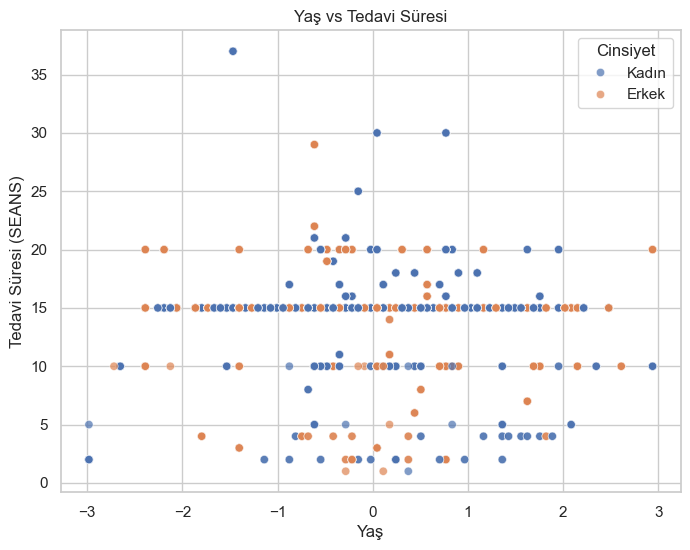

In [504]:
# ===============================
# Sayısal sütunların dağılım ve aykırı değerler
# ===============================
for col in num_cols:
    plt.figure(figsize=(10,4))
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    plt.title(f"{col} Dağılımı")
    plt.xlabel(col)
    plt.ylabel("Frekans")
    plt.show()
    
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df[col], color='orange')
    plt.title(f"{col} Boxplot")
    plt.show()

"""# ===============================
# Kategorik sütunların dağılımı
# ===============================
for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="Set2")
    plt.title(f"{col} Dağılımı")
    plt.show()"""

# ===============================
# Sayısal sütunlar arası korelasyon
# ===============================
plt.figure(figsize=(6,4))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Sayısal Sütunlar Korelasyonu")
plt.show()

# ===============================
# Tedavi Süresi ve Yaş ilişkisi
# ===============================
plt.figure(figsize=(8,6))
sns.scatterplot(x='Yas', y='TedaviSuresi_SEANS', data=df, hue='Cinsiyet', alpha=0.7)
plt.title("Yaş vs Tedavi Süresi")
plt.xlabel("Yaş")
plt.ylabel("Tedavi Süresi (SEANS)")
plt.legend(title='Cinsiyet')
plt.show()


In [505]:
num_cols = ['Yas', 'UygulamaSuresi_DK', 'TedaviSuresi_SEANS']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Kontrol
print(df[num_cols].mean())  
print(df[num_cols].std())   


Yas                  -0.0000000000
UygulamaSuresi_DK    -0.0000000000
TedaviSuresi_SEANS   -0.0000000000
dtype: float64
Yas                  1.0002237887
UygulamaSuresi_DK    1.0002237887
TedaviSuresi_SEANS   1.0002237887
dtype: float64


# Veri Analizi ve Ön İşleme Sonuçları

Bu proje kapsamında, hastalara ait çeşitli bilgiler içeren veri seti üzerinde keşifçi veri analizi (EDA) ve veri ön işleme adımları uygulanmıştır. Veri setinde toplam 2235 hasta kaydı ve 13 adet sütun bulunmaktadır. Sütunlar arasında hasta no, yaş, cinsiyet, kan grubu, kronik hastalık durumu, tedavi ve uygulama süreleri gibi bilgiler yer almaktadır.

**Eksik Değer Analizi**

- Eksik değerler, sütun bazında incelenmiştir.

- Düşük eksik oranına sahip sütunlar (Cinsiyet, Bolum) en sık görülen değer ile doldurulmuştur.

- Yüksek eksik oranına sahip sütunlar (KanGrubu, Alerji, KronikHastalik) için “Bilinmiyor” etiketi atanmıştır.

- HastaNo gibi modelleme için anlam ifade etmeyen sütunlar çıkarılmıştır.

**Kategorik Değişkenlerin İşlenmesi**

- Çok kategorili sütunlar (KanGrubu, Bolum, Alerji) OneHotEncoding ile modellenebilir hale getirilmiştir.

**Sayısal Değişkenlerin İşlenmesi**

- Yas, UygulamaSuresi_DK ve TedaviSuresi_SEANS sütunları standartlaştırılmıştır (ortalama ≈0, standart sapma ≈1). Böylece modellerin farklı ölçeklerden etkilenmesi önlenmiştir.

**Görselleştirme ve Dağılımlar**

Sayısal değişkenler için histogramlar ve yoğunluk grafikleri oluşturulmuştur.

Kategorik değişkenler için bar plot’lar ile sınıf dağılımları incelenmiştir.

Bu görseller, veri setinin yapısını ve olası uç değerleri ortaya koymaktadır.

## Genel Çıkarımlar

Veri seti temiz, eksik değerler uygun yöntemlerle doldurulmuş ve tüm değişkenler modellemeye uygun hale getirilmiştir.

Sayısal veriler standartlaştırıldığı için algoritmaların performansı olumsuz etkilenmeyecektir.

Kategorik değişkenler uygun şekilde encode edildiği için makine öğrenmesi modellerinde kullanılabilir.